In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from fbprophet import Prophet
from hts import HTSRegressor
from hts.utilities.distribution import MultiprocessingDistributor

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [3]:
data.shape

(12196, 1947)

In [4]:
data = data.iloc[np.random.choice(range(12196), 1000),:]
data.shape

(1000, 1947)

In [5]:
data['dept_id'].value_counts()

FOODS_3        274
HOUSEHOLD_1    171
HOUSEHOLD_2    165
HOBBIES_1      143
FOODS_2        128
FOODS_1         69
HOBBIES_2       50
Name: dept_id, dtype: int64

In [6]:
base = pd.to_datetime("2011-01-29")
date_list = [base + datetime.timedelta(days=x) for x in range(1941)]
print(len(date_list))
cols = ['id', 'item_id','dept_id','cat_id','store_id','state_id']
cols.extend(date_list)
data.columns = cols

1941


In [7]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,2011-02-01 00:00:00,...,2016-05-13 00:00:00,2016-05-14 00:00:00,2016-05-15 00:00:00,2016-05-16 00:00:00,2016-05-17 00:00:00,2016-05-18 00:00:00,2016-05-19 00:00:00,2016-05-20 00:00:00,2016-05-21 00:00:00,2016-05-22 00:00:00
10318,HOUSEHOLD_2_075_CA_4_evaluation,HOUSEHOLD_2_075,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3057,HOBBIES_1_009_CA_2_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_2,CA,2,1,4,2,...,1,2,3,1,3,0,3,0,4,1
7699,HOUSEHOLD_2_506_CA_3_evaluation,HOUSEHOLD_2_506,HOUSEHOLD_2,HOUSEHOLD,CA_3,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2191,FOODS_2_365_CA_1_evaluation,FOODS_2_365,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0,1,1,1,1
11952,FOODS_3_581_CA_4_evaluation,FOODS_3_581,FOODS_3,FOODS,CA_4,CA,0,3,1,4,...,2,0,0,0,0,0,0,0,0,2


In [8]:
state_data = data.drop(['id','item_id','dept_id','cat_id','store_id'],axis=1).groupby('state_id').sum()
state_data.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
state_id,,,,,,,,,,,,,,,,,,,,,
CA,1665,1464,995,1439,1137,1241,1412,1934,1699,1265,...,1747,2151,2370,1611,1529,1421,1523,1536,2097,2258


In [9]:
store_data = data.drop(['id','item_id','dept_id','cat_id','state_id'],axis=1).groupby('store_id').sum()
store_data.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,609,549,369,476,405,490,497,724,687,462,...,571,691,765,524,485,423,470,449,638,727
CA_2,443,370,223,426,237,259,418,541,299,171,...,477,501,592,371,343,342,382,420,585,487
CA_3,374,334,245,327,286,281,317,393,417,379,...,448,589,716,460,471,440,451,410,564,638
CA_4,239,211,158,210,209,211,180,276,296,253,...,251,370,297,256,230,216,220,257,310,406


In [10]:
data['cat_id'] = data['store_id'] + '_' + data['cat_id']
cat_data = data.drop(['id','item_id','dept_id','store_id','state_id'],axis=1).groupby('cat_id').sum()
cat_data.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
cat_id,,,,,,,,,,,,,,,,,,,,,
CA_1_FOODS,513,441,305,400,344,374,431,597,621,407,...,393,469,581,344,331,303,328,327,420,466
CA_1_HOBBIES,45,43,30,26,24,46,16,49,18,30,...,92,73,58,71,62,53,54,40,100,121
CA_1_HOUSEHOLD,51,65,34,50,37,70,50,78,48,25,...,86,149,126,109,92,67,88,82,118,140
CA_2_FOODS,338,288,151,336,190,224,304,393,183,97,...,337,316,375,263,243,226,249,290,347,289
CA_2_HOBBIES,51,25,28,59,26,11,63,74,72,40,...,30,37,55,25,32,38,48,22,60,45


In [11]:
data['dept_id'] = data['store_id'] + '_' + data['dept_id']
dept_data = data.drop(['id','item_id','cat_id','store_id','state_id'],axis=1).groupby('dept_id').sum()
dept_data.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
dept_id,,,,,,,,,,,,,,,,,,,,,
CA_1_FOODS_1,29,14,14,12,16,15,22,11,16,7,...,31,30,19,14,17,19,32,14,33,18
CA_1_FOODS_2,97,115,84,96,78,66,42,46,128,76,...,59,71,114,114,59,48,51,52,75,96
CA_1_FOODS_3,387,312,207,292,250,293,367,540,477,324,...,303,368,448,216,255,236,245,261,312,352
CA_1_HOBBIES_1,40,41,29,24,24,43,14,46,16,28,...,90,70,53,70,62,52,51,37,94,117
CA_1_HOBBIES_2,5,2,1,2,0,3,2,3,2,2,...,2,3,5,1,0,1,3,3,6,4


In [12]:
data['item_id'] = data['store_id'] + '_' + data['item_id']
item_data = data.drop(['id','dept_id','cat_id','store_id','state_id'],axis=1).groupby('item_id').sum()
item_data.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
item_id,,,,,,,,,,,,,,,,,,,,,
CA_1_FOODS_1_024,5,1,1,1,3,3,2,0,2,1,...,2,0,0,2,0,1,2,0,3,1
CA_1_FOODS_1_056,0,0,0,0,0,0,0,0,0,0,...,8,2,2,0,4,0,4,0,6,2
CA_1_FOODS_1_064,0,2,1,5,3,3,5,2,1,0,...,0,0,0,0,0,0,0,0,0,0
CA_1_FOODS_1_065,0,0,0,0,1,0,5,0,1,0,...,3,3,2,0,1,0,1,1,2,0
CA_1_FOODS_1_076,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,2,2,0,0,0,0


In [13]:
item_data.columns

Index([2011-01-29 00:00:00, 2011-01-30 00:00:00, 2011-01-31 00:00:00,
       2011-02-01 00:00:00, 2011-02-02 00:00:00, 2011-02-03 00:00:00,
       2011-02-04 00:00:00, 2011-02-05 00:00:00, 2011-02-06 00:00:00,
       2011-02-07 00:00:00,
       ...
       2016-05-13 00:00:00, 2016-05-14 00:00:00, 2016-05-15 00:00:00,
       2016-05-16 00:00:00, 2016-05-17 00:00:00, 2016-05-18 00:00:00,
       2016-05-19 00:00:00, 2016-05-20 00:00:00, 2016-05-21 00:00:00,
       2016-05-22 00:00:00],
      dtype='object', length=1941)

In [14]:
#res = pd.concat([state_data,store_data,cat_data,dept_data,item_data]).T
res = pd.concat([state_data,store_data,cat_data,dept_data]).T
res['total'] = res['CA']

In [15]:
res.index = pd.DatetimeIndex(pd.to_datetime(res.index), freq='infer')
res.index

DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22'],
              dtype='datetime64[ns]', length=1941, freq='D')

In [16]:
states = data.state_id.unique()
stores = data.store_id.unique()
depts = data.dept_id.unique()
cats = data.cat_id.unique()
items = data.item_id.unique()

# Here we build the tree as a dictionary. Each node (key in dict) has a list of 
# children value in dict, which in turn may also be a key in the dict, and have 
# children as well 
total = {'total': list(states)}
state_h = {k: [v for v in stores if v.startswith(k)] for k in states}
store_h = {k: [v for v in cats if v.startswith(k)] for k in stores}
dept_h = {k: [v for v in depts if v.startswith(k)] for k in cats}
item_h = {k: [v for v in items if v.startswith(k)] for k in depts}

#hierarchy = { **total,**state_h, **store_h, **dept_h, **item_h}

hierarchy = { **total,**state_h, **store_h, **dept_h}

In [17]:

from hts.hierarchy import HierarchyTree

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=res)

In [18]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [21]:
prophet_holidays = pd.DataFrame({
  'holiday': 'prophet_holidays',
  'ds': pd.to_datetime(calendar.loc[~calendar['event_name_1'].isna()].date),
  'lower_window': 0,
  'upper_window': 1,
})

In [22]:
%%time


distributor = MultiprocessingDistributor(n_workers=4,
                                         disable_progressbar=False,
                                         progressbar_title="Prophet Fitting")

clf = HTSRegressor(model='prophet', revision_method='OLS', n_jobs=12,holidays=prophet_holidays )

model = clf.fit(res.iloc[:1841], hierarchy, n_jobs=4, distributor=distributor)

preds = model.predict(steps_ahead=14)
preds.shape

Fitting models: 100%|██████████████████████████████████████████████████████████████████| 46/46 [00:30<00:00,  1.49it/s]


Wall time: 1min 1s


(1855, 46)

In [ ]:
%%time


In [ ]:
%%time


In [25]:
distributor_bu = MultiprocessingDistributor(n_workers=4,
                                         disable_progressbar=False,
                                         progressbar_title="Prophet Fitting BU")

clf_bu = HTSRegressor(model='prophet', revision_method='WLSS', n_jobs=12,holidays=prophet_holidays)
model_bu = clf_bu.fit(res.iloc[:1841], hierarchy, n_jobs=4, distributor=distributor_bu)

preds_bu = model_bu.predict(steps_ahead=14)
preds_bu.shape

Fitting models: 100%|██████████████████████████████████████████████████████████████████| 46/46 [00:30<00:00,  1.48it/s]


(1855, 46)

In [ ]:
#model.hts_result._models['CA_2_HOUSEHOLD_2_127'].model.make_future_dataframe(periods=365)

In [ ]:
ht.children[0].children[2].children[2].item.index

In [ ]:
preds.columns

In [ ]:
preds.head()

In [ ]:
res.head()

In [ ]:
res.columns

In [28]:
agg_df = res['CA']
agg_df = agg_df.reset_index()
agg_df.columns = ['ds','y']
ca_prophet = Prophet(holidays=prophet_holidays)
ca_prophet.fit(agg_df.iloc[:1841])
future = ca_prophet.make_future_dataframe(periods=14)
forecast = ca_prophet.predict(future)
forecast = forecast.set_index('ds')
forecast = forecast[['yhat']]

In [29]:
plotdf = pd.concat([res.iloc[1841:1841+14]['CA'],preds.iloc[-14:]['CA'],\
                    preds_bu.iloc[-14:]['CA'],
                    forecast.iloc[1841:1841+14]],axis=1)
plotdf.columns=['Original','PredHT','PredWl','PredAgg']

In [30]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8

<AxesSubplot:>

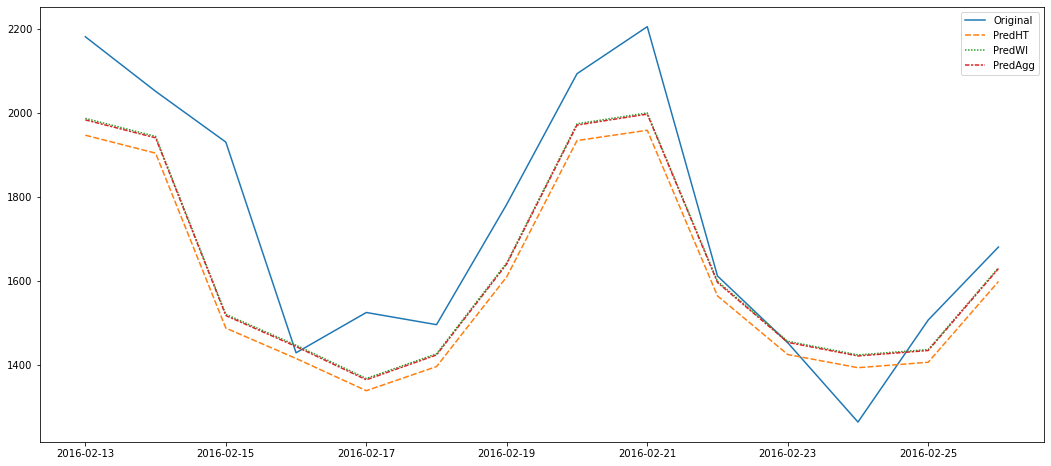

In [31]:
sns.lineplot(data=plotdf)

In [ ]:
plotdf